### Criteria: Data cleaning, data preparation, visualisation for the initial part and for the model part, applied multiple algorithms and compare them (performance), evaluate your model, apply cross validation and hyperparameter tuning. 

# Final Assignment - Group 4

#### Info from manual check of the data: 
1. Age: Age of the patient.
2. Sex: Gender of the patient (M/F).
3. ChestPainType: Type of chest pain.
4. RestingBP: Resting blood pressure.
5. Cholesterol: Serum cholesterol.
6. FastingBS: Fasting blood sugar (0 = normal, 1 = elevated).
7. RestingECG: Resting electrocardiogram results.
8. MaxHR: Maximum heart rate achieved.
9. ExerciseAngina: Exercise-induced angina (Y/N).
10. Oldpeak: ST depression induced by exercise relative to rest. (Can be negative value)
11. ST_Slope: The slope of the peak exercise ST segment.
12. GeneticMarker1: A continuous variable representing a genetic marker.
13. GeneticMarker2: Another continuous variable representing a different genetic marker.
14. BodyWeightCategory: Body weight category (Normal, Overweight, Obese, Underweight).
15. HeartDisease: The target variable (0 = no, 1 = yes).

### Importing necessary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading and Inspection

In [2]:
df = pd.read_csv('modified_heart_dataset_supervised.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.239651,198.787582,0.233115,136.643791,0.887364,0.508888,10540.282135,0.553377
std,9.432617,18.804257,109.529397,0.423046,25.662700,1.066570,0.291353,6242.988493,0.497414
min,28.000000,1.000000,-5.000000,0.000000,56.000000,-2.600000,0.000188,-365.000000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,118.000000,0.000000,0.254569,7724.750000,0.000000
50%,54.000000,131.000000,223.000000,0.000000,137.000000,0.600000,0.526046,11439.000000,1.000000
75%,60.000000,143.000000,267.000000,0.000000,156.000000,1.500000,0.761030,14664.750000,1.000000
max,77.000000,201.000000,607.000000,1.000000,201.000000,6.200000,0.999714,37520.000000,1.000000


### Data Cleaning

##### Checking for missing values

In [5]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


##### Checking for duplicates

In [6]:
dupl_rows = df[df.duplicated()]
dupl_rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease


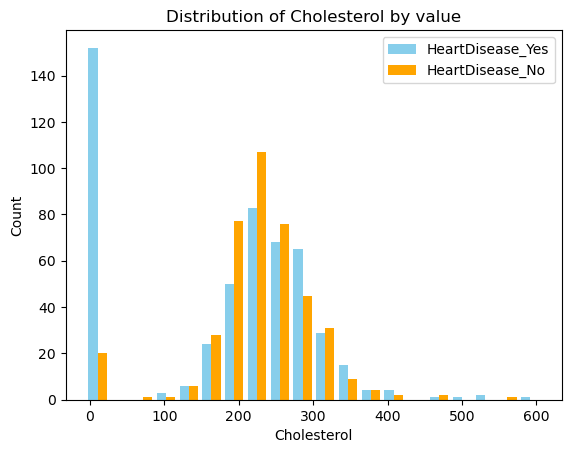

In [7]:
Cholesterol = df['Cholesterol']

HeartDisease_Yes = df['HeartDisease'] == 1
HeartDisease_No = df['HeartDisease'] == 0

plt.hist([Cholesterol[HeartDisease_Yes], Cholesterol[HeartDisease_No]], bins = 20, label = ['HeartDisease_Yes', 'HeartDisease_No'], color = ['skyblue', 'orange'])
plt.title('Distribution of Cholesterol by value')
plt.ylabel('Count')
plt.xlabel('Cholesterol')
plt.legend()

plt.show()

##### Amount of near 0 Cholesterol does not follow normal distribution. Cholesterol below 50 is assumed as incorrect data.

In [8]:
df = df[df['Cholesterol'] >= 50]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 746 non-null    int64  
 1   Sex                 746 non-null    object 
 2   ChestPainType       746 non-null    object 
 3   RestingBP           746 non-null    int64  
 4   Cholesterol         746 non-null    int64  
 5   FastingBS           746 non-null    int64  
 6   RestingECG          746 non-null    object 
 7   MaxHR               746 non-null    int64  
 8   ExerciseAngina      746 non-null    object 
 9   Oldpeak             746 non-null    float64
 10  ST_Slope            746 non-null    object 
 11  GeneticMarker1      746 non-null    float64
 12  GeneticMarker2      746 non-null    int64  
 13  BodyWeightCategory  746 non-null    object 
 14  HeartDisease        746 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 93.2+ KB


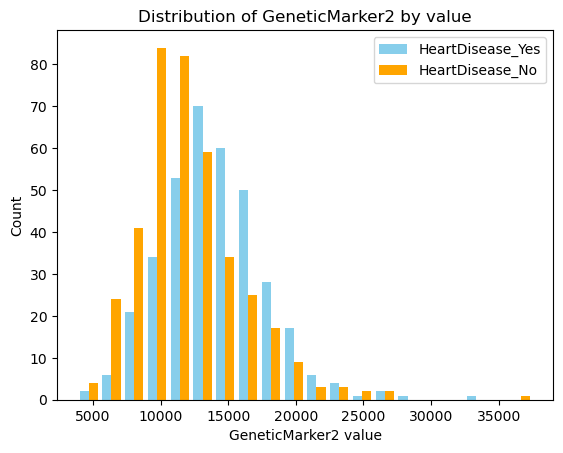

In [9]:
GeneticMarker2 = df['GeneticMarker2']

HeartDisease_Yes = df['HeartDisease'] == 1
HeartDisease_No = df['HeartDisease'] == 0

plt.hist([GeneticMarker2[HeartDisease_Yes], GeneticMarker2[HeartDisease_No]], bins = 20, label = ['HeartDisease_Yes', 'HeartDisease_No'], color = ['skyblue', 'orange'])
plt.title('Distribution of GeneticMarker2 by value')
plt.ylabel('Count')
plt.xlabel('GeneticMarker2 value')
plt.legend()

plt.show()

##### Checking for outliers

<Figure size 4000x1500 with 0 Axes>

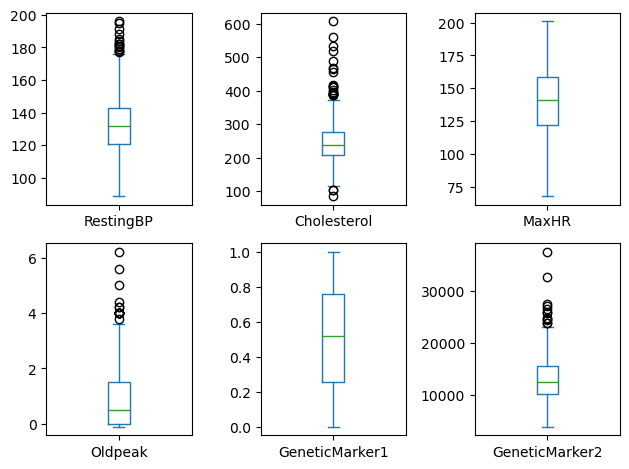

In [10]:
# Selecting columns that could have potential outliers
potential_outliers_columns = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'GeneticMarker1', 'GeneticMarker2']]

# Plot the box plots for these columns
plt.figure(figsize=(40, 15))
potential_outliers_columns.plot(kind='box', subplots=True, layout=(2, -1), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


### Identifying outliers with the IQR technique

In [11]:
# Columns to check for outliers
columns_to_check = ['RestingBP', 'Cholesterol', 'Oldpeak', 'GeneticMarker2']

# Vectorized approach to calculate IQR and bounds for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

# Identify outliers across all specified columns
outliers = ((df[columns_to_check] < lower_bounds) | (df[columns_to_check] > upper_bounds)).any(axis=1)

# Filter out outliers
df_cleaned = df[~outliers]

# Display the shape of the original and cleaned datasets
original_shape = df.shape
cleaned_shape = df_cleaned.shape


print(original_shape, cleaned_shape)

(746, 15) (694, 15)


In [12]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 694 non-null    int64  
 1   Sex                 694 non-null    object 
 2   ChestPainType       694 non-null    object 
 3   RestingBP           694 non-null    int64  
 4   Cholesterol         694 non-null    int64  
 5   FastingBS           694 non-null    int64  
 6   RestingECG          694 non-null    object 
 7   MaxHR               694 non-null    int64  
 8   ExerciseAngina      694 non-null    object 
 9   Oldpeak             694 non-null    float64
 10  ST_Slope            694 non-null    object 
 11  GeneticMarker1      694 non-null    float64
 12  GeneticMarker2      694 non-null    int64  
 13  BodyWeightCategory  694 non-null    object 
 14  HeartDisease        694 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 86.8+ KB


<Figure size 4000x1500 with 0 Axes>

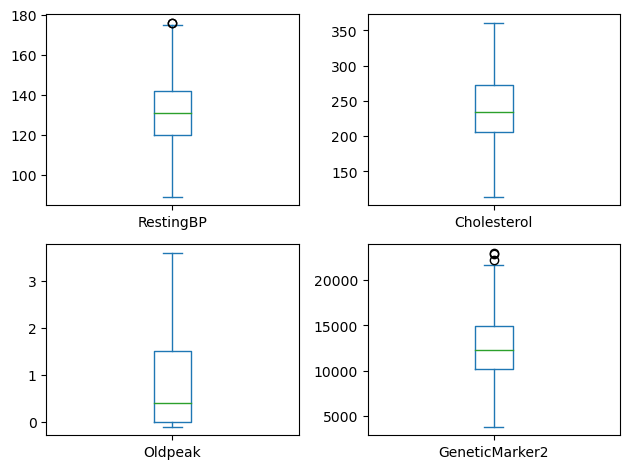

In [14]:
# Selecting columns that could have potential outliers
potential_outliers_columns = df_cleaned[['RestingBP', 'Cholesterol', 'Oldpeak', 'GeneticMarker2']]

# Plot the box plots for these columns
plt.figure(figsize=(40, 15))
potential_outliers_columns.plot(kind='box', subplots=True, layout=(2, -1), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


##### Updating the cleaned datafame 

In [15]:
df = df_cleaned

### Data Visualisation

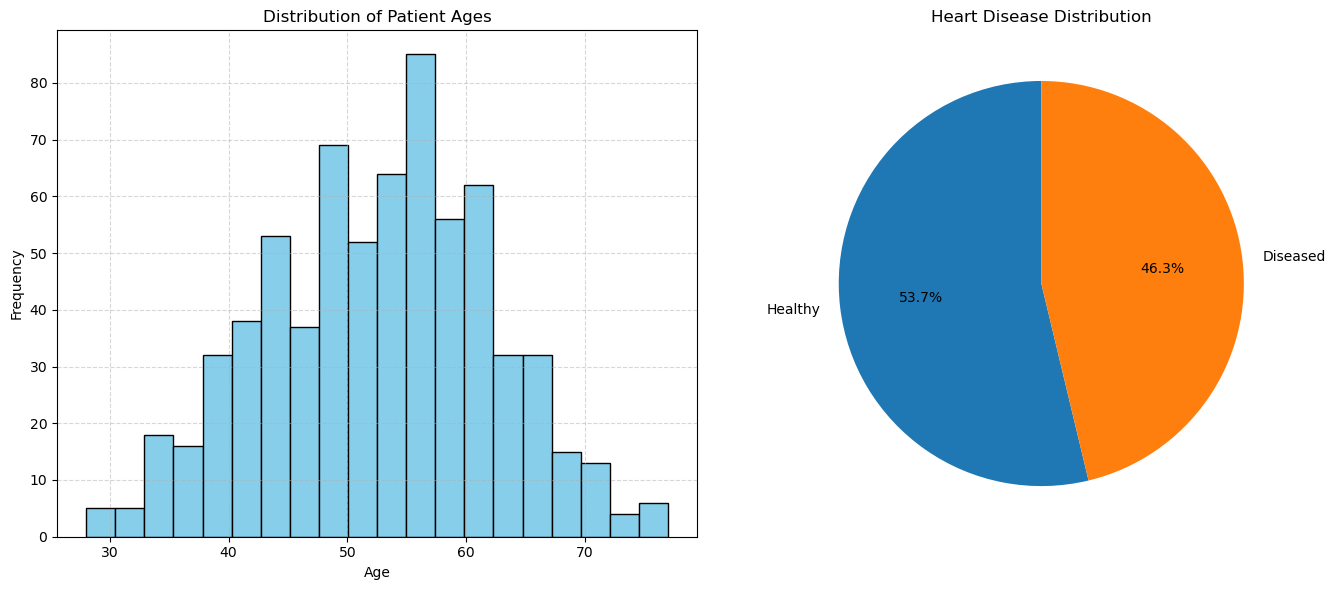

In [16]:
patient_ages = df['Age']
HD_labels = ['Healthy', 'Diseased']
HD_num = df['HeartDisease'].value_counts()

# Create a 1x2 subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram - Distribution of patient ages
ax[0].hist(patient_ages, bins=20, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Patient Ages')
ax[0].grid(True, linestyle='--', alpha=0.5)

# Pie chart for Heart Disease
ax[1].pie(HD_num, startangle=90, autopct='%1.1f%%', labels=HD_labels)
ax[1].set_title('Heart Disease Distribution')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of weightclasses that have heart disease')

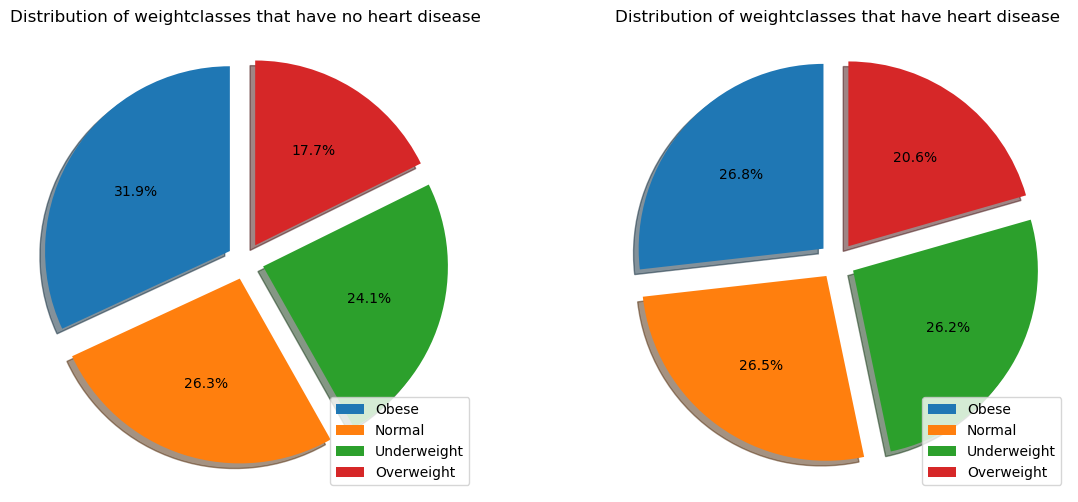

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
diseased_data = df[df['HeartDisease'] == 1]
healthy_data = df[df['HeartDisease'] == 0]


# weightclass distribution pie charts
weightclass_labels = df['BodyWeightCategory'].value_counts().index
BodyWeightHealthy = healthy_data['BodyWeightCategory']
category_num_healthy = BodyWeightHealthy.value_counts()

ax[0].pie(category_num_healthy, startangle=90, autopct= '%1.1f%%',shadow = True, explode=[0.1,0.1,0.1,0.1])
ax[0].legend(weightclass_labels,loc=4)
ax[0].set_title('Distribution of weightclasses that have no heart disease')

BodyWeightDiseased = diseased_data['BodyWeightCategory']
category_num_diseased = BodyWeightDiseased.value_counts()

ax[1].pie(category_num_diseased, startangle=90, autopct= '%1.1f%%',shadow = True, explode=[0.1,0.1,0.1,0.1])
ax[1].legend(weightclass_labels,loc=4)
ax[1].set_title('Distribution of weightclasses that have heart disease')


Weightclass does not seem to have a significant impact on disease count

In [18]:
df = df.drop('BodyWeightCategory', axis=1)

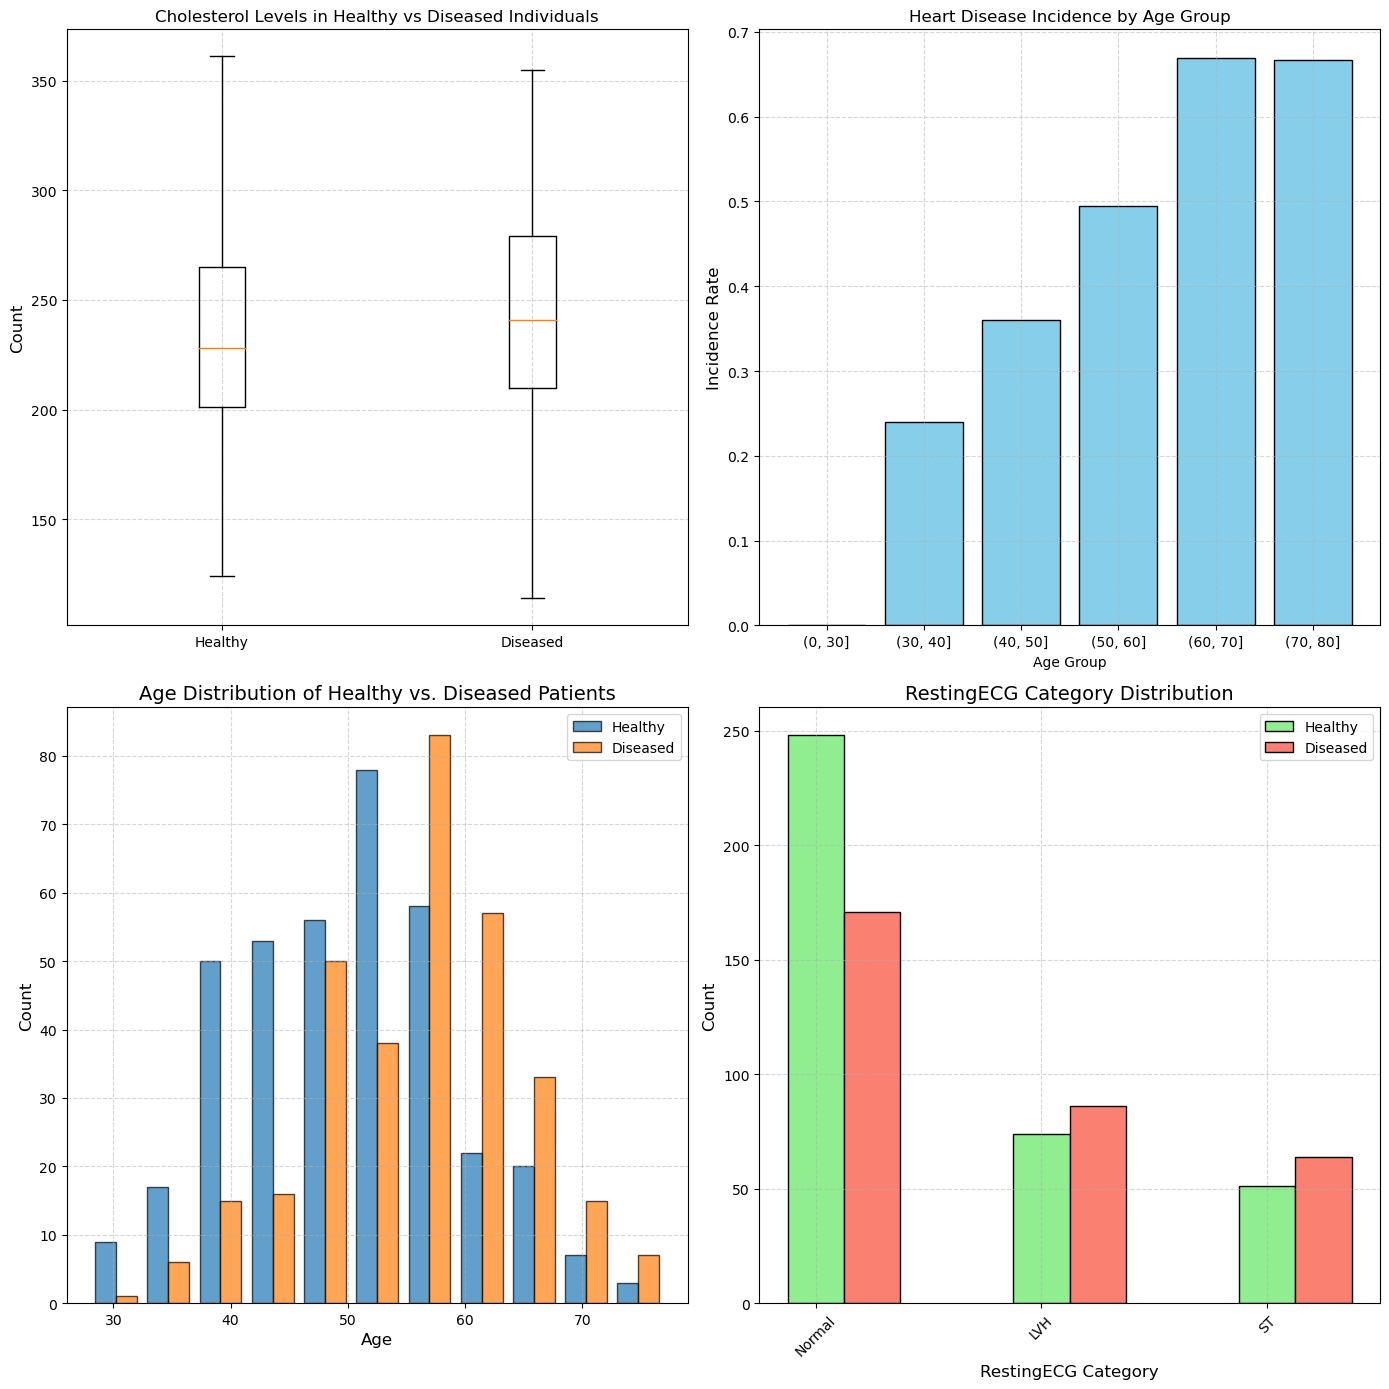

In [19]:
diseased_data = df[df['HeartDisease'] == 1]
healthy_data = df[df['HeartDisease'] == 0]

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

# Box Plots for Cholesterol in Healthy vs Diseased
healthy_chol = df[df['HeartDisease'] == 0]['Cholesterol']
diseased_chol = df[df['HeartDisease'] == 1]['Cholesterol']
axes[0, 0].boxplot([healthy_chol, diseased_chol], labels=['Healthy', 'Diseased'])
axes[0, 0].set_title('Cholesterol Levels in Healthy vs Diseased Individuals')
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Age Group vs Heart Disease Rate
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90])
age_grouped = df.groupby('AgeGroup')['HeartDisease'].mean()
axes[0, 1].bar(age_grouped.index.astype(str), age_grouped.values, color = 'skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Incidence Rate', fontsize=12)
axes[0, 1].set_title('Heart Disease Incidence by Age Group')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Diseased age histogram
diseased_ages = diseased_data['Age']
healthy_ages = healthy_data['Age']

axes[1, 0].hist([healthy_ages, diseased_ages], bins=11, alpha=0.7, label=['Healthy', 'Diseased'],  edgecolor='black')
axes[1, 0].legend()
axes[1, 0].set_title('Age Distribution of Healthy vs. Diseased Patients', fontsize=14)
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# RestingECG in relation to heart disease
RestECG_values = df['RestingECG'].value_counts()
RestECG_labels = RestECG_values.index

Healthy_RestECG_values = healthy_data['RestingECG'].value_counts()
Diseased_RestECG_values = diseased_data['RestingECG'].value_counts()

bar_width = 0.25
spacing = np.arange(len(RestECG_labels))


axes[1, 1].bar(spacing, Healthy_RestECG_values, width=bar_width, label='Healthy', color='lightgreen', edgecolor='black')
axes[1, 1].bar(spacing + bar_width, Diseased_RestECG_values, width=bar_width, label='Diseased', color='salmon', edgecolor='black')

axes[1, 1].legend()
axes[1, 1].set_xticks(spacing)
axes[1, 1].set_xticklabels(RestECG_labels, rotation=45)
axes[1, 1].set_title('RestingECG Category Distribution', fontsize=14)
axes[1, 1].set_xlabel('RestingECG Category', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

df = df.drop('AgeGroup', axis=1)

## Feature Engineering

#### Encoding categorical variables using Dummy Encoding

In [20]:
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True).astype(int)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,141,289,0,173,0,0,11560,0,1,1,0,0,1,0,0,0,1
1,49,158,175,0,151,1,0,8575,1,0,0,1,0,1,0,0,1,0
2,37,135,285,0,97,0,0,10545,0,1,1,0,0,0,1,0,0,1
3,48,140,214,0,112,1,0,10272,1,0,0,0,0,1,0,1,1,0
4,54,149,192,0,124,0,0,10368,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,106,268,0,135,1,0,12060,1,1,0,0,1,1,0,0,1,0
914,68,142,190,1,141,3,0,12920,1,1,0,0,0,1,0,0,1,0
915,57,135,128,0,118,1,0,7296,1,1,0,0,0,1,0,1,1,0
916,57,128,236,0,172,0,0,13452,1,0,1,0,0,0,0,0,1,0


## Model Training

In [21]:
# Importing necessary libraries for model training

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


# Spliting the dataset into features (X) and target variable (y)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Nomalize data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale features to a range between 0 and 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression model

In [23]:
# Train a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)


# Make predictions
logistic_predictions = logistic_regression_model.predict(X_test)


In [24]:
# Evaluate the performance of the model 

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

print(f'Confusion Matrix:')
print(logistic_conf_matrix)

print(f'\nEvaluation Metrics:')
print(f'Accuracy: {logistic_accuracy:4f}')
print(f'Precision: {logistic_precision:4f}')
print(f'Recall: {logistic_recall:4f}')
print(f'F1 Score: {logistic_f1:4f}')


Confusion Matrix:
[[64  5]
 [14 56]]

Evaluation Metrics:
Accuracy: 0.863309
Precision: 0.918033
Recall: 0.800000
F1 Score: 0.854962


##### ROC curve to visualise model's performence

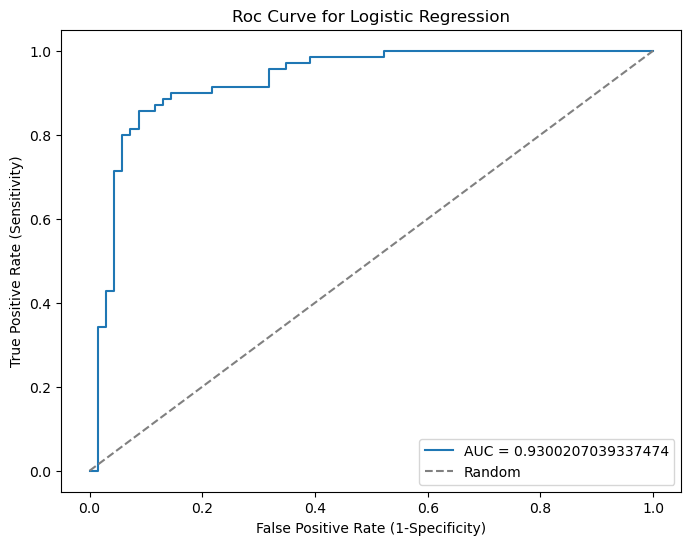

AUC: 0.9300207039337474


In [25]:
# Getting predicted probabilities for the positice class
y_prob_logistic_regression = logistic_regression_model.predict_proba(X_test)[:,1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic_regression)

# Calculate AUC
roc_auc_logistic_regression = roc_auc_score(y_test, y_prob_logistic_regression)

# Plot the ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_logistic_regression}')
plt.plot([0,1],[0,1], linestyle = '--', color = 'gray', label = 'Random')
plt.title('Roc Curve for Logistic Regression')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

# Display AUC Score
print(f'AUC: {roc_auc_logistic_regression}')

##### K-Fold Cross-Validation

In [26]:
# Apply K-Fold Cross-Validation with 5 folds
X_normalized = scaler.fit_transform(X)
cs_score_logistic_regression = cross_val_score(logistic_regression_model, X_normalized, y, cv=5, scoring = 'recall')

# Print the recall scores for each fold
print("Recall scores for each fold:", cs_score_logistic_regression)

# Print the average recall score
print("Average Recall:", cs_score_logistic_regression.mean())

Recall scores for each fold: [0.8125     0.96875    1.         0.75384615 0.734375  ]
Average Recall: 0.8538942307692308


### Decision Tree Classifier

In [27]:
# Train Decision Tree Classifier
decision_tree_class = DecisionTreeClassifier(max_depth = 7)
decision_tree_class.fit(X_train, y_train)

# Make predictions
decision_tree_class_predictions = decision_tree_class.predict(X_test)


In [28]:
# Evaluate the performance of the model 

decision_tree_class_accuracy = accuracy_score(y_test, decision_tree_class_predictions)
decision_tree_class_precision = precision_score(y_test, decision_tree_class_predictions)
decision_tree_class_recall = recall_score(y_test, decision_tree_class_predictions)
decision_tree_class_f1 = f1_score(y_test, decision_tree_class_predictions)
decision_tree_class_conf_matrix = confusion_matrix(y_test, decision_tree_class_predictions)

print("Confusion Matrix:")
print(decision_tree_class_conf_matrix)

print(f'\nEvaluation Metrics:')
print(f'Accuracy: {decision_tree_class_accuracy:4f}')
print(f'Precision: {decision_tree_class_precision:4f}')
print(f'Recall: {decision_tree_class_recall:4f}')
print(f'F1 Score: {decision_tree_class_f1:4f}')

Confusion Matrix:
[[60  9]
 [14 56]]

Evaluation Metrics:
Accuracy: 0.834532
Precision: 0.861538
Recall: 0.800000
F1 Score: 0.829630


##### ROC curve to visualise model's performence

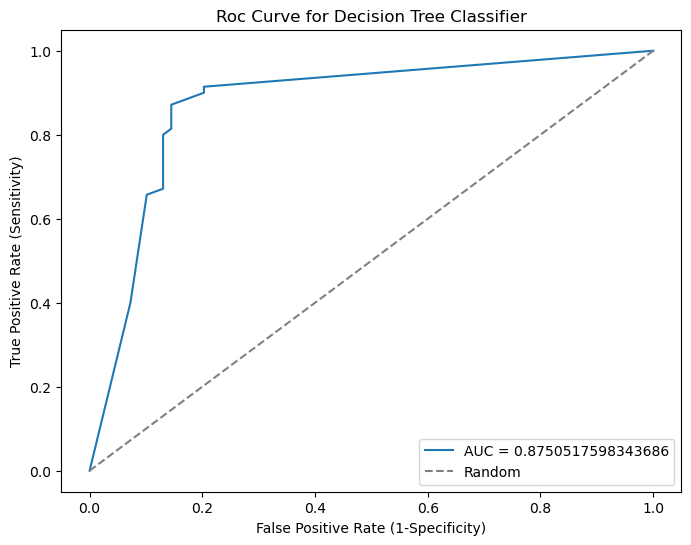

AUC: 0.8750517598343686


In [40]:
# Getting predicted probabilities for the positice class
y_prob_decision_tree_class = decision_tree_class.predict_proba(X_test)[:,1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_decision_tree_class)

# Calculate AUC
roc_auc_decision_tree_class = roc_auc_score(y_test, y_prob_decision_tree_class)

# Plot the ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_decision_tree_class}')
plt.plot([0,1],[0,1], linestyle = '--', color = 'gray', label = 'Random')
plt.title('Roc Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

# Display AUC Score
print(f'AUC: {roc_auc_decision_tree_class}')

##### K-Fold Cross-Validation

In [30]:
# Apply K-Fold Cross-Validation with 5 folds
cs_score_decision_tree_class = cross_val_score(decision_tree_class, X_normalized, y, cv=5, scoring = 'recall')

# Print the recall scores for each fold
print("Recall scores for each fold:", cs_score_decision_tree_class)

# Print the average recall score
print("Average Recall:", cs_score_decision_tree_class.mean())

Recall scores for each fold: [0.6875     0.875      0.9375     0.66153846 0.75      ]
Average Recall: 0.7823076923076923


### Random Forest Classifier

In [31]:
# Train Random Forest Classifier
random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train, y_train)

# Make predictions
random_forest_predictions = random_forest_class.predict(X_test)

In [32]:
# Evaluate the performence of the model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Confusion Matrix:")
print(random_forest_conf_matrix)

print(f'\nEvaluation Metrics:')
print(f'Accuracy: {random_forest_accuracy:4f}')
print(f'Precision: {random_forest_precision:4f}')
print(f'Recall: {random_forest_recall:4f}')
print(f'F1 Score: {random_forest_f1:4f}')

Confusion Matrix:
[[62  7]
 [ 9 61]]

Evaluation Metrics:
Accuracy: 0.884892
Precision: 0.897059
Recall: 0.871429
F1 Score: 0.884058


##### ROC curve to visualise model's performence

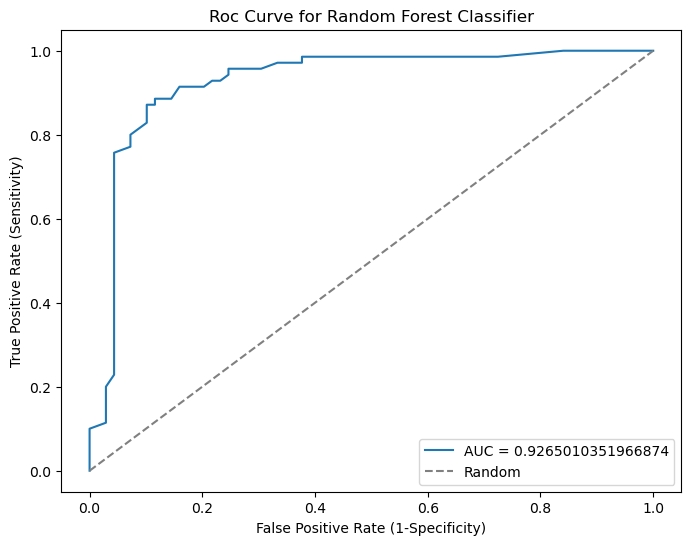

AUC: 0.9265010351966874


In [33]:
# Getting predicted probabilities for the positice class
y_prob_random_forest_class = random_forest_class.predict_proba(X_test)[:,1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_random_forest_class)

# Calculate AUC
roc_auc_random_forest_class = roc_auc_score(y_test, y_prob_random_forest_class)

# Plot the ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_random_forest_class}')
plt.plot([0,1],[0,1], linestyle = '--', color = 'gray', label = 'Random')
plt.title('Roc Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

# Display AUC Score
print(f'AUC: {roc_auc_random_forest_class}')

##### K-Fold Cross-Validation

In [34]:
# Apply K-Fold Cross-Validation with 5 folds
cs_score_random_forest_class = cross_val_score(random_forest_class, X_normalized, y, cv=5, scoring = 'recall')

# Print the recall scores for each fold
print("Recall scores for each fold:", cs_score_random_forest_class)

# Print the average recall score
print("Average Recall:", cs_score_random_forest_class.mean())

Recall scores for each fold: [0.75       0.96875    0.953125   0.72307692 0.765625  ]
Average Recall: 0.8321153846153846


### Support Vector Classification

In [35]:
# Train SVC 
SVC_model = SVC(probability=True)
SVC_model.fit(X_train, y_train)

# Make predictions
SVC_model_predictions = SVC_model.predict(X_test)

In [36]:
# Evaluate the performence of the model
SVC_accuracy = accuracy_score(y_test, SVC_model_predictions)
SVC_precision = precision_score(y_test, SVC_model_predictions)
SVC_recall = recall_score(y_test, SVC_model_predictions)
SVC_f1 = f1_score(y_test, SVC_model_predictions)
SVC_conf_matrix = confusion_matrix(y_test, SVC_model_predictions)

print("Confusion Matrix:")
print(SVC_conf_matrix)

print(f'\nEvaluation Metrics:')
print(f'Accuracy: {SVC_accuracy:4f}')
print(f'Precision: {SVC_precision:4f}')
print(f'Recall: {SVC_recall:4f}')
print(f'F1 Score: {SVC_f1:4f}')

Confusion Matrix:
[[62  7]
 [10 60]]

Evaluation Metrics:
Accuracy: 0.877698
Precision: 0.895522
Recall: 0.857143
F1 Score: 0.875912


##### ROC curve to visualise model's performence

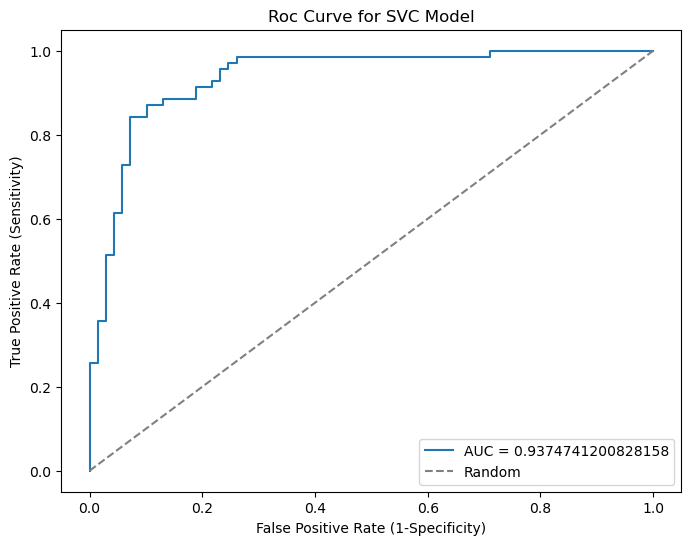

AUC: 0.9374741200828158


In [37]:
# Getting predicted probabilities for the positice class
y_prob_SVC_model = SVC_model.predict_proba(X_test)[:,1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_SVC_model)

# Calculate AUC
roc_auc_SVC_model = roc_auc_score(y_test, y_prob_SVC_model)

# Plot the ROC Curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_SVC_model}')
plt.plot([0,1],[0,1], linestyle = '--', color = 'gray', label = 'Random')
plt.title('Roc Curve for SVC Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

# Display AUC Score
print(f'AUC: {roc_auc_SVC_model}')

##### K-Fold Cross-Validation

In [38]:
# Apply K-Fold Cross-Validation with 5 folds
cs_score_SVC_model = cross_val_score(SVC_model, X_normalized, y, cv=5, scoring = 'recall')

# Print the recall scores for each fold
print("Recall scores for each fold:", cs_score_SVC_model)

# Print the average recall score
print("Average Recall:", cs_score_SVC_model.mean())

Recall scores for each fold: [0.875      0.984375   0.953125   0.76923077 0.71875   ]
Average Recall: 0.8600961538461538


## Summary

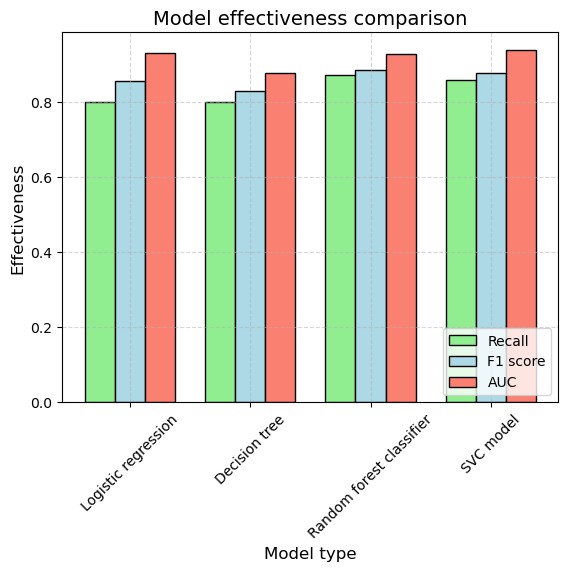

In [39]:
bar_width = 0.25

spacing = np.arange(4)

conclusion_labels= ['Logistic regression', 'Decision tree', 'Random forest classifier','SVC model']
 
Recall_conclusion = [logistic_recall,decision_tree_class_recall,random_forest_recall,SVC_recall]

F1_conclusion = [logistic_f1,decision_tree_class_f1,random_forest_f1,SVC_f1]

AUC_conclusion = [roc_auc_logistic_regression,roc_auc_decision_tree_class,roc_auc_random_forest_class,roc_auc_SVC_model]
 
 
plt.bar(spacing - bar_width, Recall_conclusion, width=bar_width, label='Recall', color='lightgreen', edgecolor='black')

plt.bar(spacing, F1_conclusion, width=bar_width, label='F1 score', color='lightblue', edgecolor='black')

plt.bar(spacing + bar_width, AUC_conclusion, width=bar_width, label='AUC', color='salmon', edgecolor='black')
 
plt.legend(loc=4)

plt.xticks(spacing, conclusion_labels,rotation=45)

plt.title('Model effectiveness comparison', fontsize=14)

plt.xlabel('Model type', fontsize=12)

plt.ylabel('Effectiveness', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

##### SVC model
Recall: 0.8571
F1 Score: 0.8759
AUC: 0.9374

##### Logistic regression
Recall: 0.8000
F1 Score: 0.8549
AUC: 0.9300

##### Random forest model
Recall: 0.8714
F1 Score: 0.8840
AUC: 0.9265

##### Decison tree model
Recall: 0.8000
F1 Score: 0.8296
AUC: 0.8750